# Simple Linear Regression

In [1]:
# import all the lib
import pandas as pd
import numpy as np

In [25]:
# reading the dataset
df = pd.read_csv('Salary_Data.csv')

In [26]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [27]:
# Let's look at our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [28]:
# Looking at statistcs
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


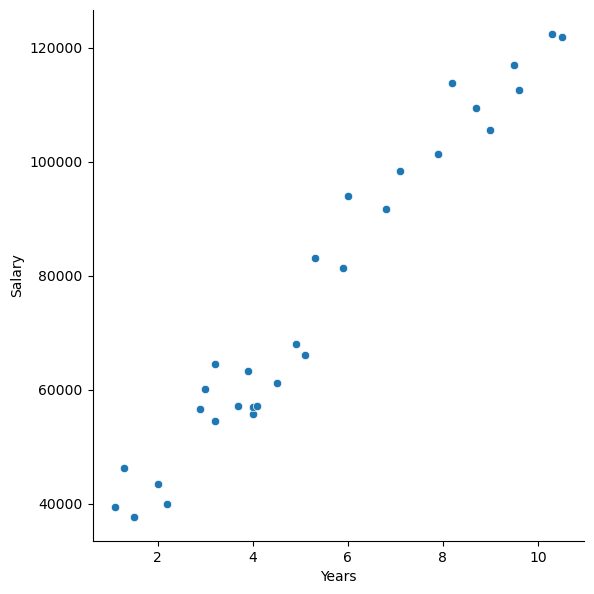

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# PLotting a scatter plot
sns.pairplot(df,x_vars=['YearsExperience'],y_vars=['Salary'],height=6,kind='scatter')

plt.xlabel('Years')
plt.ylabel('Salary')
plt.show()

In [36]:
# Sperating data into X and Y
X = df['YearsExperience']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [37]:
# Sperating data into X and Y
y = df['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [38]:
# Import train-test scikit learn
from sklearn.model_selection import train_test_split

In [74]:
# Split the data for train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [75]:
X_train.shape

(21,)

In [76]:
X_train.values.reshape(-1,1)

array([[ 5.3],
       [ 7.9],
       [ 4. ],
       [ 2.2],
       [10.5],
       [ 1.1],
       [ 1.3],
       [ 5.9],
       [ 4.5],
       [ 6. ],
       [ 7.1],
       [ 1.5],
       [ 6.8],
       [ 3.9],
       [ 5.1],
       [ 4.9],
       [ 8.2],
       [ 3.2],
       [ 2. ],
       [ 8.7],
       [ 3.2]])

In [77]:
X_train.values.reshape(-1,1).shape

(21, 1)

In [78]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [79]:
y_train

17     83088.0
22    101302.0
11     55794.0
4      39891.0
29    121872.0
0      39343.0
1      46205.0
18     81363.0
14     61111.0
19     93940.0
21     98273.0
2      37731.0
20     91738.0
10     63218.0
16     66029.0
15     67938.0
23    113812.0
7      54445.0
3      43525.0
24    109431.0
8      64445.0
Name: Salary, dtype: float64

In [148]:
# # Create new axis for x column
# X_train = X_train[:,np.newaxis]
# X_test = X_test[:,np.newaxis]

# Fitting the model

In [80]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [81]:
# Fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [149]:
# Predicting the Salary for the Test values
y_pred = lr.predict(X_test)

# Plotting the predictions

In [86]:
len(y_test)

9

In [152]:
x_range = [i for i in range(len(y_test))]

In [92]:
x_range

[0, 1, 2, 3, 4, 5, 6, 7, 8]

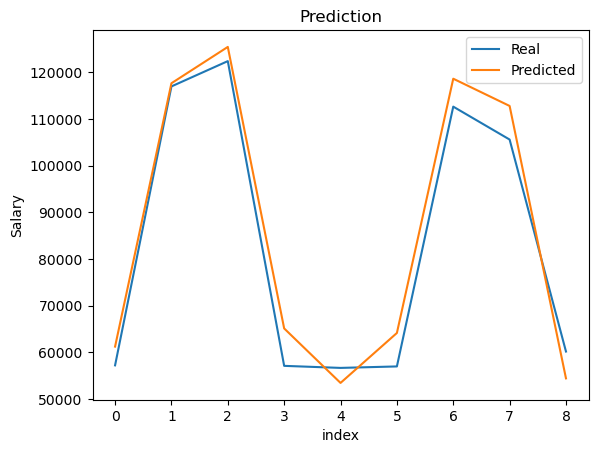

In [150]:
plt.xlabel('index')
plt.ylabel('Salary')
plt.title('Prediction')

plt.plot(x_range,y_test)
plt.plot(x_range,y_pred)

# Function add a legend  
plt.legend(["Real", "Predicted"])

# Looking at the score

In [111]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [114]:
# calculate Mean square error
mean_squared_error(y_test,y_pred)

30310299.043402452

In [115]:
mse = mean_squared_error(y_test,y_pred)

In [117]:
# Calculate R square vale
r2_score(y_test,y_pred)

0.9627668685473267

In [118]:
rsq = r2_score(y_test,y_pred)

In [119]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 30310299.043402452
r square : 0.9627668685473267


In [151]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 25202.887786154883
Coefficient of the line: [9731.20383825]


# Plotting our line

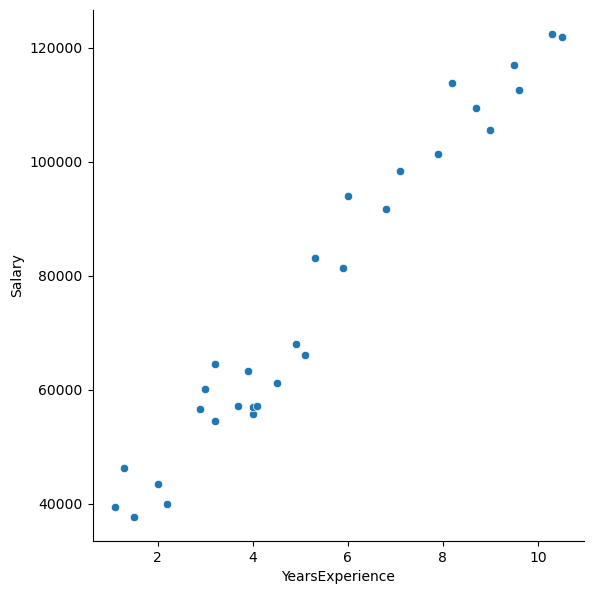

In [121]:
sns.pairplot(df,x_vars=['YearsExperience'],y_vars=['Salary'],height=6,kind='scatter')

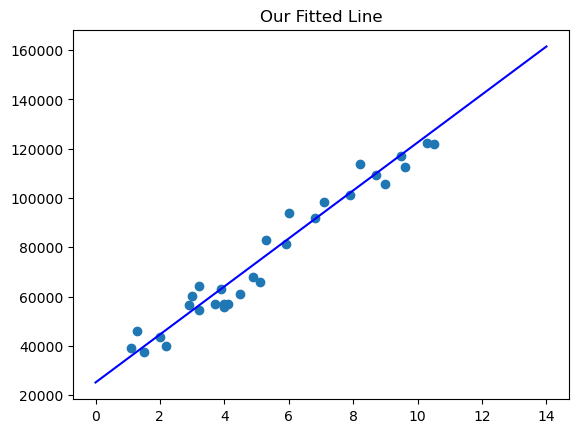

In [136]:
# Create a list of values in the best fit line
abline_values = [lr.coef_ * i + lr.intercept_ for i in range(0,15,1)]
x = [i for i in range(0,15,1)]

# Plot the best fit line over the actual values
plt.scatter(df['YearsExperience'],df['Salary'])

plt.plot(x, abline_values, 'b')

plt.title('Our Fitted Line')
plt.show()

# Looking deeper

In [137]:
import statsmodels.formula.api as smf

In [144]:
model = smf.ols(formula = 'Salary ~ YearsExperience', data = df)

In [145]:
result = model.fit()

In [147]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.14e-20
Time:                        11:59:30   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     